In [2]:
import numpy as np
from typing import List, NoReturn, Dict
import matplotlib.pyplot as plt

%matplotlib inline

Да, большой банк, 2500 оконо в отделении, зато клиентов-то тоже 2500

In [3]:
windows_n = 2500
attempts = 1000
alphas = [1.0, 2.0, 4.0, 8.0]

In [4]:
# Рисуем графички
def make_plot(data: Dict[float, List[float]]) -> NoReturn:
    xx = np.linspace(1, windows_n, windows_n).astype(int)
    for alpha in alphas:
        plt.plot(xx, data[alpha], label = f"alpha = {alpha}")
    leg = plt.legend(loc = 'best', ncol = 1, fancybox = True)
    leg.get_frame().set_alpha(0.5)

In [5]:
def make_wait_time(alpha, n):
    return np.random.exponential(alpha, n)

### Одно окно обрабатывает только 2 человека
Изначально у каждого окна задаем время ожидания, берем окно с минимальным временем и вытаскиваем его из множества окон (обратно не кладем), `i`-ое вытащенное -- то, сколько ждет `i`-ый в очереди. Это эквивалетно тому, чтобы просто отсортировать список ожидания каждого окна.

In [6]:
def run_once_2_in_window(alpha: float) -> np.array:
    return np.array(sorted(list(make_wait_time(alpha, windows_n))))

### Одно окно обрабатывает сколько угодно человек
Изначально у каждого окна задаем время ожидания, берем окно с минимальным временем и вытаскиваем его из множества окон, случайно выбираем, сколько ожидаем у окна, кладем обратно окно в множество окно, но теперь оно ждет все время + новое время, `i`-ое вытащенное -- то, сколько ждет `i`-ый в очереди.

In [7]:
import heapq as hq

def run_once_any_in_window(alpha: float) -> np.array:
    ans = []
    heap = list(make_wait_time(alpha, windows_n))
    hq.heapify(heap)
    for _ in range(windows_n):
        t = hq.heappop(heap)
        ans.append(t)
        hq.heappush(heap, t + np.random.exponential(alpha))
    return ans

In [8]:
# Запускаем много раз
def run(run_once) -> Dict[float, List[float]]: # alpha -> [k]
    alpha_map = {}
    for alpha in alphas:
        sums = np.zeros(windows_n)
        for _ in range(attempts):
            sums += run_once(alpha)
        sums /= attempts
        alpha_map[alpha] = sums
    return alpha_map

## Одно окно обрабатывает только 2 человека

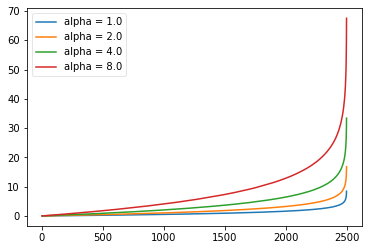

In [9]:
make_plot(run(run_once_2_in_window))

## Одно окно обрабатывает сколько угодно человек

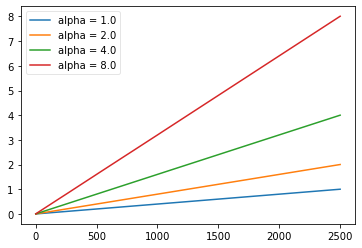

In [10]:
make_plot(run(run_once_any_in_window))

## Мораль
Если каждая касса в пятерочке обрабатывала бы только 2 человек, то до 22:00 успеть было бы трудно...